In [77]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

#print(X)
#print(y)

In [78]:
len(X)

100

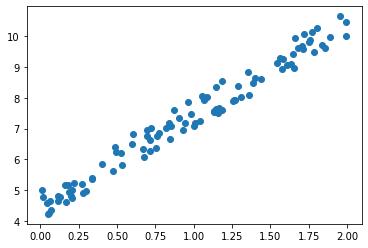

In [79]:
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [80]:
X_b = np.c_[np.ones((100, 1)), X]
print(X_b)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

[[1.         1.57811303]
 [1.         0.18429272]
 [1.         0.4751307 ]
 [1.         0.05127771]
 [1.         1.30675793]
 [1.         0.06506174]
 [1.         0.2068469 ]
 [1.         1.66432172]
 [1.         1.13149298]
 [1.         0.67564669]
 [1.         0.48952453]
 [1.         1.80603438]
 [1.         1.01008885]
 [1.         0.83756594]
 [1.         0.05385906]
 [1.         1.7506432 ]
 [1.         1.56241206]
 [1.         0.81898124]
 [1.         1.72164344]
 [1.         0.16663352]
 [1.         0.20120958]
 [1.         1.35361372]
 [1.         1.65498745]
 [1.         1.99694462]
 [1.         0.76304936]
 [1.         1.43797092]
 [1.         0.27642589]
 [1.         0.59611721]
 [1.         0.49097618]
 [1.         0.7569818 ]
 [1.         0.60337507]
 [1.         0.69854127]
 [1.         0.8688982 ]
 [1.         0.33459737]
 [1.         1.68199076]
 [1.         0.84865938]
 [1.         1.35874796]
 [1.         0.12910014]
 [1.         0.11560164]
 [1.         1.85413382]


In [81]:
theta_best

array([[4.42854313],
       [3.00914504]])

In [82]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [83]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [84]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.42854313],
       [10.44683321]])

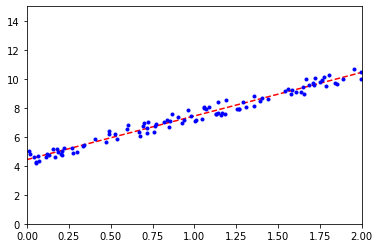

In [85]:
#plt.clear()
plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [86]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.42854313],
       [10.44683321]])

In [87]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.42854313],
       [3.00914504]])

In [88]:
np.linalg.pinv(X_b).dot(y)

array([[4.42854313],
       [3.00914504]])

In [89]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [90]:
print(theta)

[[4.42854313]
 [3.00914504]]


[[2.39666375]
 [2.98364827]]
[[2.71935447]
 [3.62804377]]
[[3.08638243]
 [3.80771295]]
[[3.30336265]
 [3.9370586 ]]
[[3.46186446]
 [4.03154426]]
[[3.35653024]
 [3.86481609]]
[[3.31063031]
 [3.78642575]]
[[3.50054528]
 [3.82810778]]
[[3.62275335]
 [3.85338614]]
[[3.65532084]
 [3.88114048]]
[[3.75807597]
 [3.89440618]]
[[3.61920623]
 [3.65660455]]
[[3.72622506]
 [3.7130243 ]]
[[3.74134453]
 [3.73349022]]
[[3.5544147 ]
 [3.36020169]]
[[3.73973784]
 [3.45092191]]
[[3.80587803]
 [3.54045018]]
[[3.76345314]
 [3.49790887]]
[[3.74617806]
 [3.48045951]]
[[3.80743559]
 [3.58241174]]
[[3.78463397]
 [3.56515133]]
[[3.77094437]
 [3.53838317]]
[[3.78015584]
 [3.54705052]]
[[3.85341979]
 [3.55650891]]
[[3.72436515]
 [3.29879394]]
[[3.79858645]
 [3.4304562 ]]
[[3.85220299]
 [3.44839616]]
[[3.89059183]
 [3.47583851]]
[[3.96376114]
 [3.49189752]]
[[3.93305714]
 [3.46341866]]
[[3.94004934]
 [3.47582222]]
[[3.97515821]
 [3.48772903]]
[[3.98056755]
 [3.48863041]]
[[3.89516594]
 [3.33592954]]
[[3.86505211]


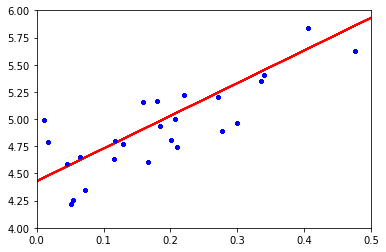

In [91]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.rand(2,1)

X_gradient = np.c_[np.ones((2, 1)), X_new]

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        eta = learning_schedule(epoch * m + i)

        theta = theta - eta * gradients

        y_gradient = X_gradient.dot(theta_best)
        
        print(theta)

    plt.plot(X_gradient, y_gradient, 'r-')
    plt.plot(X, y, 'b.')
    plt.axis([0, 0.5, 4, 6])

plt.show()

In [92]:
print(theta)

[[4.42927113]
 [3.01406288]]


In [93]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [94]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.4286567]), array([3.05005064]))

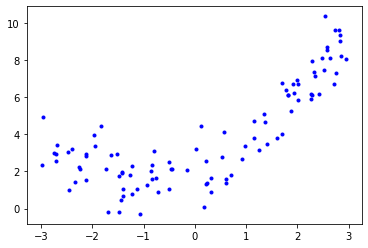

In [95]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m , 1) 

plt.plot(X, y, 'b.')
plt.show()

In [96]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[1.69911786]
[1.69911786 2.88700149]


In [97]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.97873903]), array([[0.98402481, 0.52012219]]))

In [98]:
X_plot = np.array([[-3], [3]])
X_plot_poly = poly_features.fit_transform(X_plot)

print(X_plot[0])
print(X_plot_poly)

y_poly_predict = lin_reg.predict(X_poly)
#print(y_poly_predict)

[-3]
[[-3.  9.]
 [ 3.  9.]]


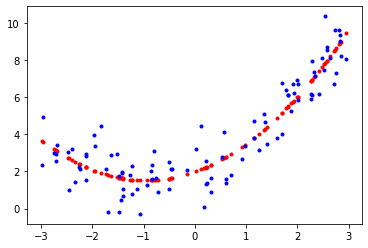

In [99]:
plt.plot(X, y_poly_predict, 'r.')
plt.plot(X, y, 'b.')

plt.show()

In [100]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [101]:
def Plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')

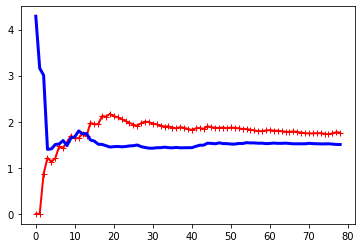

In [102]:
lin_reg = LinearRegression()
Plot_learning_curve(lin_reg, X, y)

(0.0, 80.0, 0.0, 3.0)

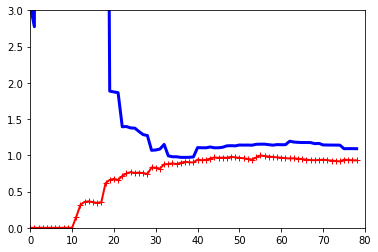

In [103]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

Plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

In [104]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.38960111]])

In [105]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.37524721])

In [106]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

lasso_reg.predict([[1.5]])

array([5.35436548])

In [107]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.3971278])

In [108]:
from sklearn.linear_model import ElasticNet

elastic_req = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_req.fit(X, y)

elastic_req.predict([[1.5]])

array([5.35261571])

In [134]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly = poly_scaler.fit_transform(X_train)
X_val_poly = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=10000, tol=np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly)
    val_error = mean_squared_error(y_val, y_val_predict)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [135]:
print(minimum_val_error, best_epoch)
print(best_model)

best_model.fit(X, y.ravel())
best_model.predict([[1.5]])

1.3438024773640367 271
SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=10000,
             penalty=None, tol=inf, warm_start=True)


array([2.21320541])